In [1]:
import torch
import fit.sine as T
import numpy as np

from IPython.display import HTML
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt

%matplotlib inline
torch.set_printoptions(precision=4, linewidth=500, sci_mode=True)

/home/apervez/miniconda3/envs/lppde/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/apervez/miniconda3/envs/lppde/lib/python3.8/site-packages/torchvision/image.so: undefined symbol: _ZN3c107WarningC1ENS_7variantIJNS0_11UserWarningENS0_18DeprecationWarningEEEERKNS_14SourceLocationENSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEEb'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


Using double precision solver


/home/apervez/work/src/mech-nn-dev/fit/sine.py:129: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.steps = torch.tensor(self.steps)
/home/apervez/work/src/mech-nn-dev/solver/lp_sparse_central_diff_eps.py:514: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.derivative_row_sorted = torch.tensor(row_sorted)
/home/apervez/work/src/mech-nn-dev/solver/lp_sparse_central_diff_eps.py:515: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.derivative_column_sorted = torch.tensor(column_sorted)
/home/apervez/work/src/mech-nn-dev/solver/lp_spa

Test fitting an exponentially damped noisy sine wave with a second order ODE

In [2]:
T.train()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/apervez/miniconda3/envs/lppde/lib/python3.8/site-packages/pytorch_lightning/trainer/connectors/logger_connector/logger_connector.py:67: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default

  | Name  | Type | Params
-------------------------------
0 | model | Sine | 402   
-------------------------------
402       Trainable params
0         Non-trainable params
402       Total params
0.002     Total estimated model params size (MB)
/home/apervez/miniconda3/envs/lppde/lib/python3.8/site-pac

Epoch 999: 100%|██████████| 1/1 [00:00<00:00, 26.66it/s, v_num=503, train_loss=0.0543, eps=4.43e-6]

`Trainer.fit` stopped: `max_epochs=1000` reached.


Epoch 999: 100%|██████████| 1/1 [00:00<00:00, 22.14it/s, v_num=503, train_loss=0.0543, eps=4.43e-6]


In [3]:
end = T.method.model.end
n_step = T.method.model.n_step
_y = np.linspace(0, end, n_step)

In [4]:
func_list = T.method.func_list
y_list = T.method.y_list
n_iter =500

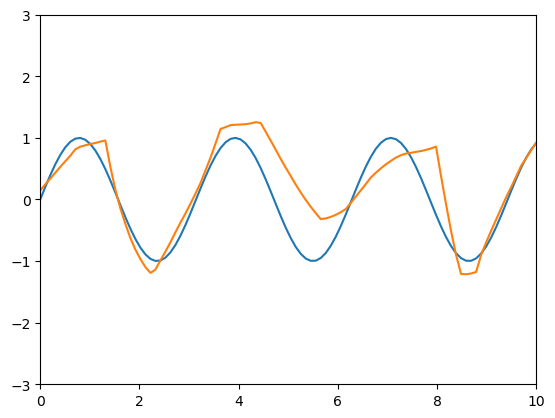

In [5]:

fig, ax = plt.subplots(1,1)
ax.set_xlim((0,end))
ax.set_ylim((-3,3))

line1, = ax.plot([], [])
line2, = ax.plot([], [])


def animate(t):
    line1.set_data(_y,y_list[5*t])
    line2.set_data(_y,func_list[5*t])
    return line1,
anim = FuncAnimation(fig, animate, frames=100, interval=20, blit=True)

HTML(anim.to_html5_video())